## APS 2 - Transferência de Calor

### Luca Mizrahi, Gustavo Oliveira, Arthur Tamm

#### Tarefa 3

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definindo parâmetros	
n = 1
K = 1 # m^2/s
alpha = 1 # m/s
T = 3 # s
Q = 100 # kg / ms
Lx = 30 # m
Ly = 20 # m
a = n / 1.4 # m
b = 60 / (n+5) # m

delta_x = 0.5 # m
delta_y = 0.5 # m
# delta_t = delta_x ** 2 / (4*K) - 0.01 # s
delta_t = 0.05
# delta_t
ERRO = 0

a_idx = int(a / delta_x)
b_idx = int(b / delta_y)

tempo_total = 10*T
tempo = np.arange(0, tempo_total, delta_t)

# Construir matriz de condições iniciais. Lembrando que o que é i no código é j na teoria, e vice versa.
c = int(Lx/delta_x) # numero de colunas
l = int(Ly/delta_y) # numero de linhas
C = np.zeros((l, c))

In [3]:
# Dimensões da matriz de concentração
c, l

(60, 40)

In [4]:
print(delta_t)
print(tempo_total)
#print(tempo)

0.05
30


In [5]:
for t in range(len(tempo)):
    Cf = np.copy(C)

    if t <= T / delta_t:
        C[a_idx, b_idx] += (Q / (delta_x * delta_y)) * delta_t # kg / ms

    for i in range(1, l - 1):
        for j in range(1, c - 1):

            u = alpha
            v = alpha * np.sin(np.pi * i * delta_x / 5)

            a1 = -v * (C[i + 1, j] - C[i - 1, j]) / (2 * delta_x)
            a2 = -u * (C[i, j + 1] - C[i, j - 1]) / (2 * delta_y)
            a3 = K * (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / delta_x ** 2
            a4 = K * (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / delta_y ** 2
            
            Cf[i, j] = C[i, j] + delta_t * (a1 + a2 + a3 + a4)
            
            if Cf[i, j] < 0:
                Cf[i, j] = 0
    
    #Linha 0 = linha 1
    Cf[0,:] = Cf[1,:]
    #Linha l-1 = linha l-2
    Cf[-1,:] = Cf[-2,:]
    #Coluna 0 = coluna 1
    Cf[:,0] = Cf[:,1]
    #Coluna c-1 = coluna c-2
    Cf[:,-1] = Cf[:,-2]

    C = np.copy(Cf)

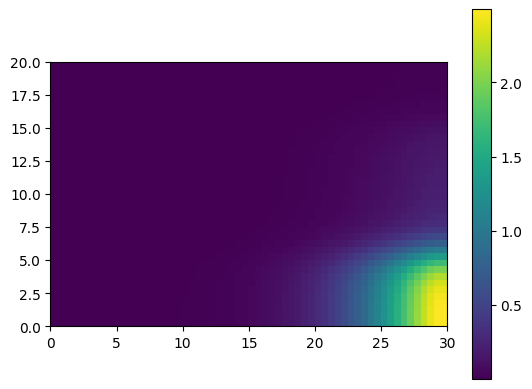

In [7]:
plt.imshow(C, extent=[0,Lx,Ly,0])
plt.gca().invert_yaxis()

cbar = plt.colorbar()

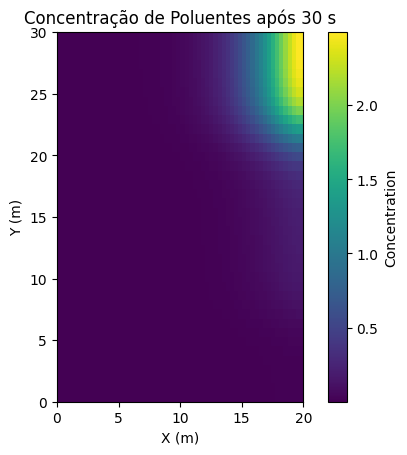

In [8]:
#Graficos
plt.imshow(C, cmap='viridis', extent=[0, Ly, 0, Lx])
plt.colorbar(label='Concentration')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title(f'Concentração de Poluentes após {tempo_total} s')
plt.show()

### Tarefa 4

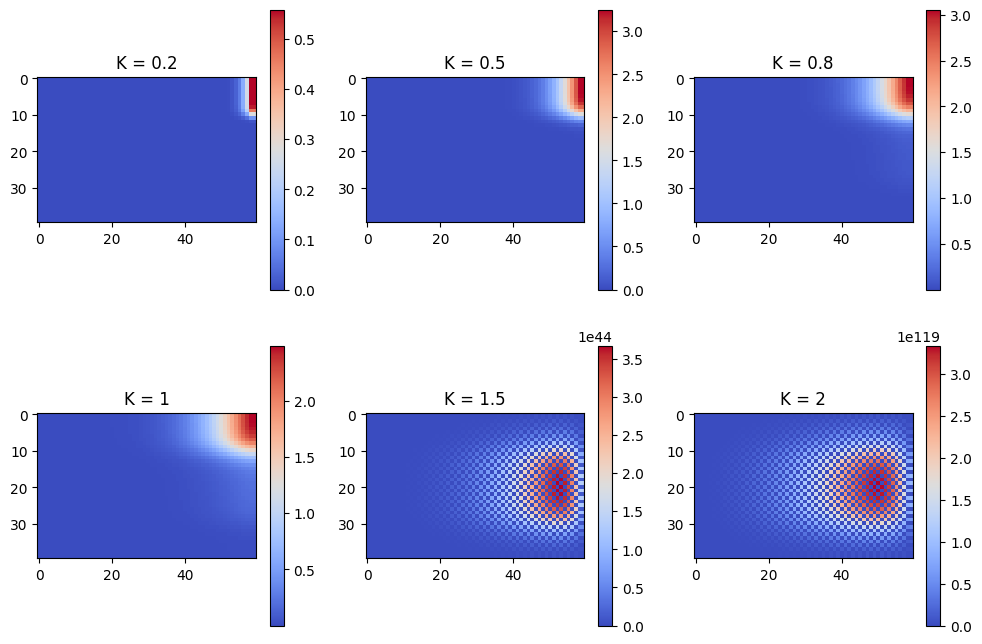

In [3]:
K_list = [0.2, 0.5, 0.8, 1, 1.5, 2]
plt.figure(figsize=(12, 8))
C = np.zeros((l, c))
for index, K in enumerate(K_list):
    C = np.zeros((l, c))
    for t in range(len(tempo)):
        Cf = np.copy(C)

        if t <= T / delta_t:
            C[a_idx, b_idx] += (Q / (delta_x * delta_y)) * delta_t # kg / ms

        for i in range(1, l - 1):
            for j in range(1, c - 1):

                u = alpha
                v = alpha * np.sin(np.pi * i * delta_x / 5)

                a1 = -v * (C[i + 1, j] - C[i - 1, j]) / (2 * delta_x)
                a2 = -u * (C[i, j + 1] - C[i, j - 1]) / (2 * delta_y)
                a3 = K * (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / delta_x ** 2
                a4 = K * (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / delta_y ** 2
                
                Cf[i, j] = C[i, j] + delta_t * (a1 + a2 + a3 + a4)
                
                if Cf[i, j] < 0:
                    Cf[i, j] = 0
        
        #Linha 0 = linha 1
        Cf[0,:] = Cf[1,:]
        #Linha l-1 = linha l-2
        Cf[-1,:] = Cf[-2,:]
        #Coluna 0 = coluna 1
        Cf[:,0] = Cf[:,1]
        #Coluna c-1 = coluna c-2
        Cf[:,-1] = Cf[:,-2]

        C = np.copy(Cf)

    plt.subplot(2, 3, index + 1)
    plt.imshow(Cf, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()  # Adicione uma barra de cores
    plt.title('K = ' + str(K))
    # Mostre o mapa de calor
plt.show()
        

Quanto maior o K, maior a difusão do poluente.

### Tarefa 5

A concentração chega na borda superior em 0.05 segundos 



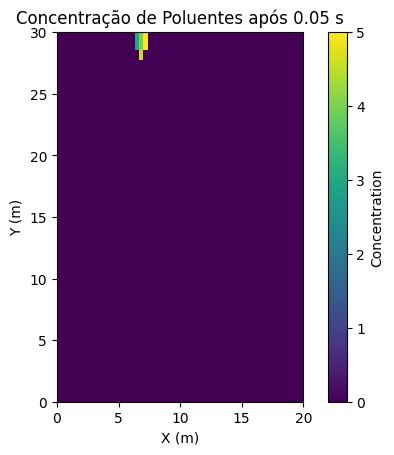

A concentração chega na borda direita em 8.10 segundos 



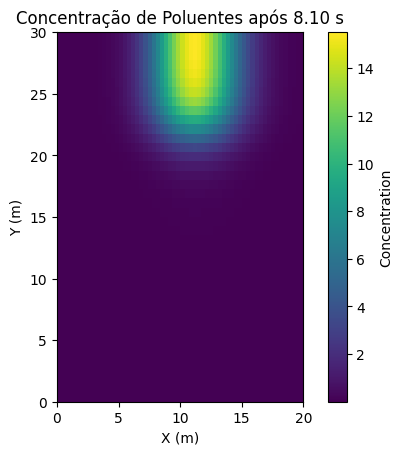

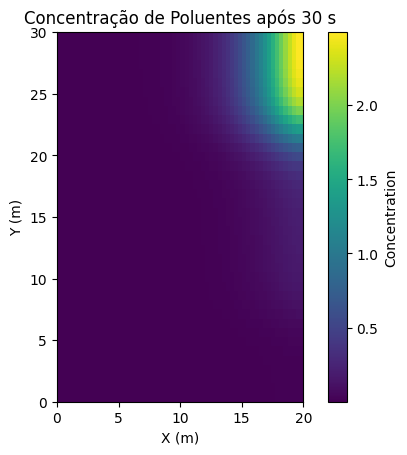

In [8]:
K = 1

chegou_borda_superior = False #C[0, :] 
chegou_borda_inferior = False #C[-1, :]
chegou_borda_esquerda = False #C[:, 0]
chegou_borda_direita = False #C[:, -1]

C = np.zeros((l, c))

for t in range(len(tempo)):
    Cf = np.copy(C)

    if t <= T / delta_t:
        C[a_idx, b_idx] += (Q / (delta_x * delta_y)) * delta_t # kg / ms

    for i in range(1, l - 1):
        for j in range(1, c - 1):

            u = alpha
            v = alpha * np.sin(np.pi * i * delta_x / 5)

            a1 = -v * (C[i + 1, j] - C[i - 1, j]) / (2 * delta_x)
            a2 = -u * (C[i, j + 1] - C[i, j - 1]) / (2 * delta_y)
            a3 = K * (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / delta_x ** 2
            a4 = K * (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / delta_y ** 2
            
            Cf[i, j] = C[i, j] + delta_t * (a1 + a2 + a3 + a4)
            
            if Cf[i, j] < 0:
                Cf[i, j] = 0

            if Cf[0,:].sum() > 1 and not chegou_borda_superior:
                chegou_borda_superior = True
                print(f'A concentração chega na borda superior em {t*delta_t:.2f} segundos \n')
                plt.imshow(Cf, cmap='viridis', extent=[0, Ly, 0, Lx])
                plt.colorbar(label='Concentration')
                plt.xlabel('X (m)')
                plt.ylabel('Y (m)')
                plt.title(f'Concentração de Poluentes após {t*delta_t:.2f} s')
                plt.show()

            if Cf[-1,:].sum() > 1 and not chegou_borda_inferior:
                chegou_borda_inferior = True
                print(f'A concentração chega na borda inferior em {t*delta_t:.2f} segundos \n')
                plt.imshow(Cf, cmap='viridis', extent=[0, Ly, 0, Lx])
                plt.colorbar(label='Concentration')
                plt.xlabel('X (m)')
                plt.ylabel('Y (m)')
                plt.title(f'Concentração de Poluentes após {t*delta_t:.2f} s')
                plt.show()

            if Cf[:,0].sum() > 1 and not chegou_borda_esquerda:
                chegou_borda_esquerda = True
                print(f'A concentração chega na borda esquerda em {t*delta_t:.2f} segundos \n')
                plt.imshow(Cf, cmap='viridis', extent=[0, Ly, 0, Lx])
                plt.colorbar(label='Concentration')
                plt.xlabel('X (m)')
                plt.ylabel('Y (m)')
                plt.title(f'Concentração de Poluentes após {t*delta_t:.2f} s')
                plt.show()

            if Cf[:,-1].sum() > 1 and not chegou_borda_direita:
                chegou_borda_direita = True
                print(f'A concentração chega na borda direita em {t*delta_t:.2f} segundos \n')
                plt.imshow(Cf, cmap='viridis', extent=[0, Ly, 0, Lx])
                plt.colorbar(label='Concentration')
                plt.xlabel('X (m)')
                plt.ylabel('Y (m)')
                plt.title(f'Concentração de Poluentes após {t*delta_t:.2f} s')
                plt.show()
            
    #Linha 0 = linha 1
    Cf[0,:] = Cf[1,:]
    #Linha l-1 = linha l-2
    Cf[-1,:] = Cf[-2,:]
    #Coluna 0 = coluna 1
    Cf[:,0] = Cf[:,1]
    #Coluna c-1 = coluna c-2
    Cf[:,-1] = Cf[:,-2]

    C = np.copy(Cf)

#Graficos
plt.imshow(C, cmap='viridis', extent=[0, Ly, 0, Lx])
plt.colorbar(label='Concentration')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title(f'Concentração de Poluentes após {tempo_total} s')
plt.show()

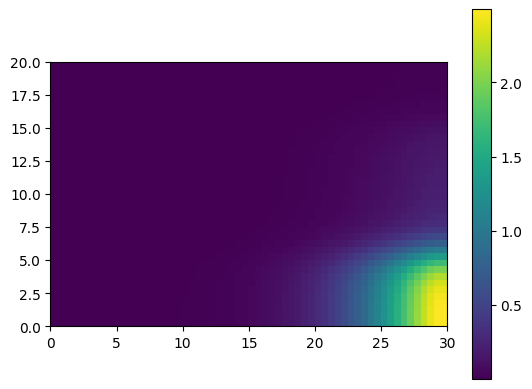

In [4]:
plt.imshow(C, extent=[0,Lx,Ly,0])
plt.gca().invert_yaxis()

cbar = plt.colorbar()

### Teste do Programa

In [10]:
# Definindo parâmetros

K = 1 # m^2/s
alpha = 1 # m/s
T = 2 # s
Q = 80 # kg / ms
Lx = 30 # m
Ly = 30 # m
a = 15 # m
b = 15 # m

delta_x = 0.5  # m
delta_y = 0.5 # m
delta_t = 0.05 # s
# delta_t
# ERRO = 0.1

a_idx = int(a / delta_x)
b_idx = int(b / delta_y)

tempo = np.arange(0, 5, delta_t)

# Construir matriz de condições iniciais. Lembrando que o que é i no código é j na teoria, e vice versa.
c = int(Lx/delta_x) # numero de colunas
l = int(Ly/delta_y) # numero de linhas
C = np.zeros((l, c))

In [11]:
# Dimensões da matriz de concentração
c, l

(60, 60)

In [12]:
for t in range(len(tempo)):
    Cf = np.copy(C)

    if t <= T / delta_t:
        C[a_idx, b_idx] += (Q / (delta_x * delta_y)) * delta_t # kg / ms

    for i in range(1, l - 1):
        for j in range(1, c - 1):

            # if((t <= T) and abs(i*delta_x - b) <= ERRO and abs(j*delta_y - a) <= ERRO ):
            #     qc = Q / (delta_x * delta_y) # kg / ms
            # else: 
            #     qc = 0

            # t1 = (Cp[i][j+1] - Cp[i][j-1]) / (2*delta_x)
            # t2 = 0*np.sin(np.pi/5 * j) * (Cp[i+1][j] - Cp[i-1][j]) / (2*delta_y)
            # t3 = (Cp[i][j+1] - 2*Cp[i][j] + Cp[i][j-1]) / (delta_x**2)
            # t4 = (Cp[i+1][j] - 2*Cp[i][j] + Cp[i-1][j]) / (delta_y**2)
            
            # Cf[i][j] = Cp[i][j] + delta_t * (qc - alpha * (t1 + t2) + K * (t3 + t4))
            
            # if Cf[i][j] < 0:
            #     Cf[i][j] = 0

            u = 1
            v = 0

            a1 = -v * (C[i + 1, j] - C[i - 1, j]) / (2 * delta_x)
            a2 = -u * (C[i, j + 1] - C[i, j - 1]) / (2 * delta_y)
            a3 = K * (C[i + 1, j] - 2 * C[i, j] + C[i - 1, j]) / delta_x ** 2
            a4 = K * (C[i, j + 1] - 2 * C[i, j] + C[i, j - 1]) / delta_y ** 2
            
            Cf[i, j] = C[i, j] + delta_t * (a1 + a2 + a3 + a4)
            
            if Cf[i, j] < 0:
                Cf[i, j] = 0
    
    #Linha 0 = linha 1
    Cf[0,:] = Cf[1,:]
    #Linha l-1 = linha l-2
    Cf[-1,:] = Cf[-2,:]
    #Coluna 0 = coluna 1
    Cf[:,0] = Cf[:,1]
    #Coluna c-1 = coluna c-2
    Cf[:,-1] = Cf[:,-2]


    # if(Erro.mai() < 0.0001):
    #     print('Convergiu em ', 10*t, ' ms.')
    #     break
    C = np.copy(Cf)

In [13]:
np.max(Cf)

3.285038916027374

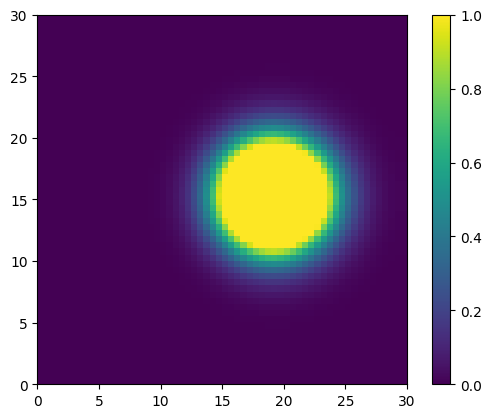

In [14]:
plt.imshow(Cf, extent=[0,Lx,Ly,0], vmax = 1)
plt.gca().invert_yaxis()

cbar = plt.colorbar()

In [15]:
Cf[40][40]

0.6221791920533917